# GARCH Model - Generalized Autoregressive Conditional Heteroskedasticity 

### GARCH is an approach to estimating the volatility of financial markets. Financial institutions use the model to estimate the return volatility of stocks, bonds, and other investment vehicles. Some investment experts believe we should focus on forecasting the return volatility as opposed to forecasting prices. According to them, there is more conclusive correlation information when analyzing volatility, while analysis of prices alone mostly exhibit random walk behavior.

In [11]:
import numpy as np
import pandas as pd
import arch as arch
from arch.__future__ import reindexing
from datetime import datetime
import matplotlib

%matplotlib inline

In [3]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv", parse_dates=True, index_col="Date") 
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices = stock_prices["2020":"2022"]

In [13]:
returns = stock_prices["Return"]
returns

Date
2020-01-02    0.834437
2020-01-03   -0.967646
2020-01-06    0.358128
2020-01-07   -0.471390
2020-01-08    0.030988
                ...   
2021-07-13   -0.321300
2021-07-14   -0.322336
2021-07-15    0.506631
2021-07-16   -0.650653
2021-07-19   -1.885567
Name: Return, Length: 389, dtype: float64

In [14]:
from arch import arch_model
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
# Fit the GARCH Model
results = model.fit(disp="off")
# Summarize the model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:               -681.912
Distribution:                  Normal   AIC:                           1369.82
Method:            Maximum Likelihood   BIC:                           1381.72
                                        No. Observations:                  389
Date:                Sun, Jul 25 2021   Df Residuals:                      389
Time:                        22:46:11   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1868  6.396e-02      2.921  3.491e-03 [6.145e-02,  0.312]
alpha[1]       0.2094  5.205e-02      4.023  5.743e-05   [  0.107,  0.311]
beta[1]        0.7180  5.678e-02     12.644  1.205e-36   [  0.607,  0.829]
==========================================================================

Covariance estimator: robust
"""

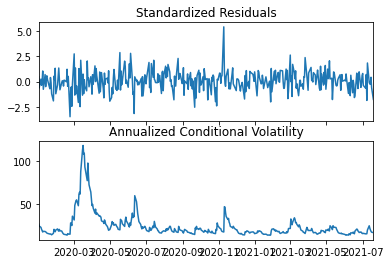

In [18]:
# Plot the model estimate of annualized volatility
annualized_vol = results.plot(annualize='D')

In [24]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 5

# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = results.forecast(start='07-19-21', horizon=forecast_horizon)
forecasts

In [25]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2021-07-19,21.067402,21.417021,21.736232,22.028134,22.295429


In [26]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date,2021-07-19
h.1,21.067402
h.2,21.417021
h.3,21.736232
h.4,22.028134
h.5,22.295429


<AxesSubplot:>

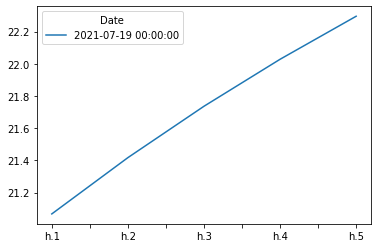

In [27]:
final.plot()